# Import Library dan Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import yellowbrick
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap

In [ ]:
data = pd.read_csv('/content/CC GENERAL.csv')
data.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

# Pre-Process Data

In [ ]:
# Checking Missing Value
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

<Axes: >

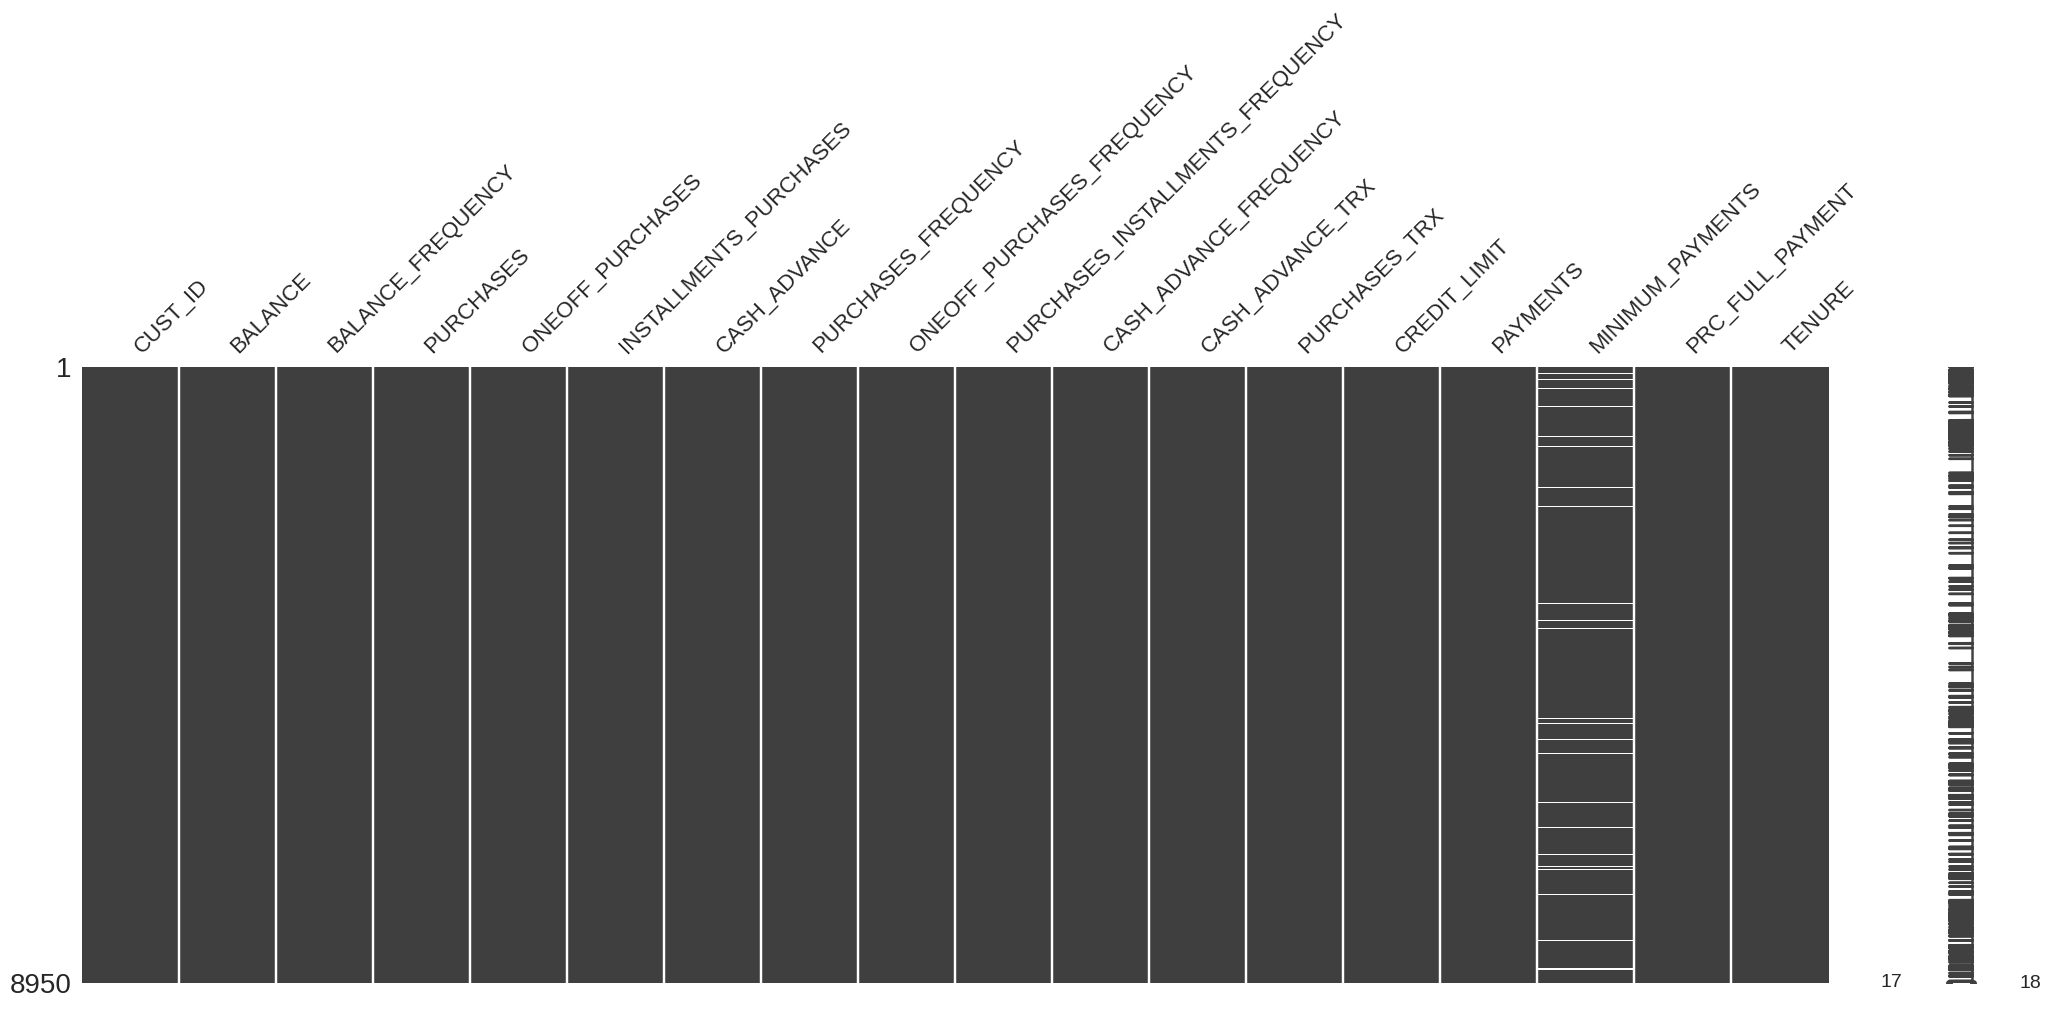

In [ ]:
# Visualisasi Missing Data Matrix
msno.matrix(data, figsize = (25, 8))

In [ ]:
# Drop CUST_ID column
data = data.drop(['CUST_ID'], axis=1)

In [ ]:
# Drop Null value in Credit Limit Column
data.dropna(subset = ['CREDIT_LIMIT'], inplace=True)
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
# Filling null value in MINIMUM_PAYMENTS column using the media strategy
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [ ]:
# Checking data
data.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

# Exploratory Data Analysis

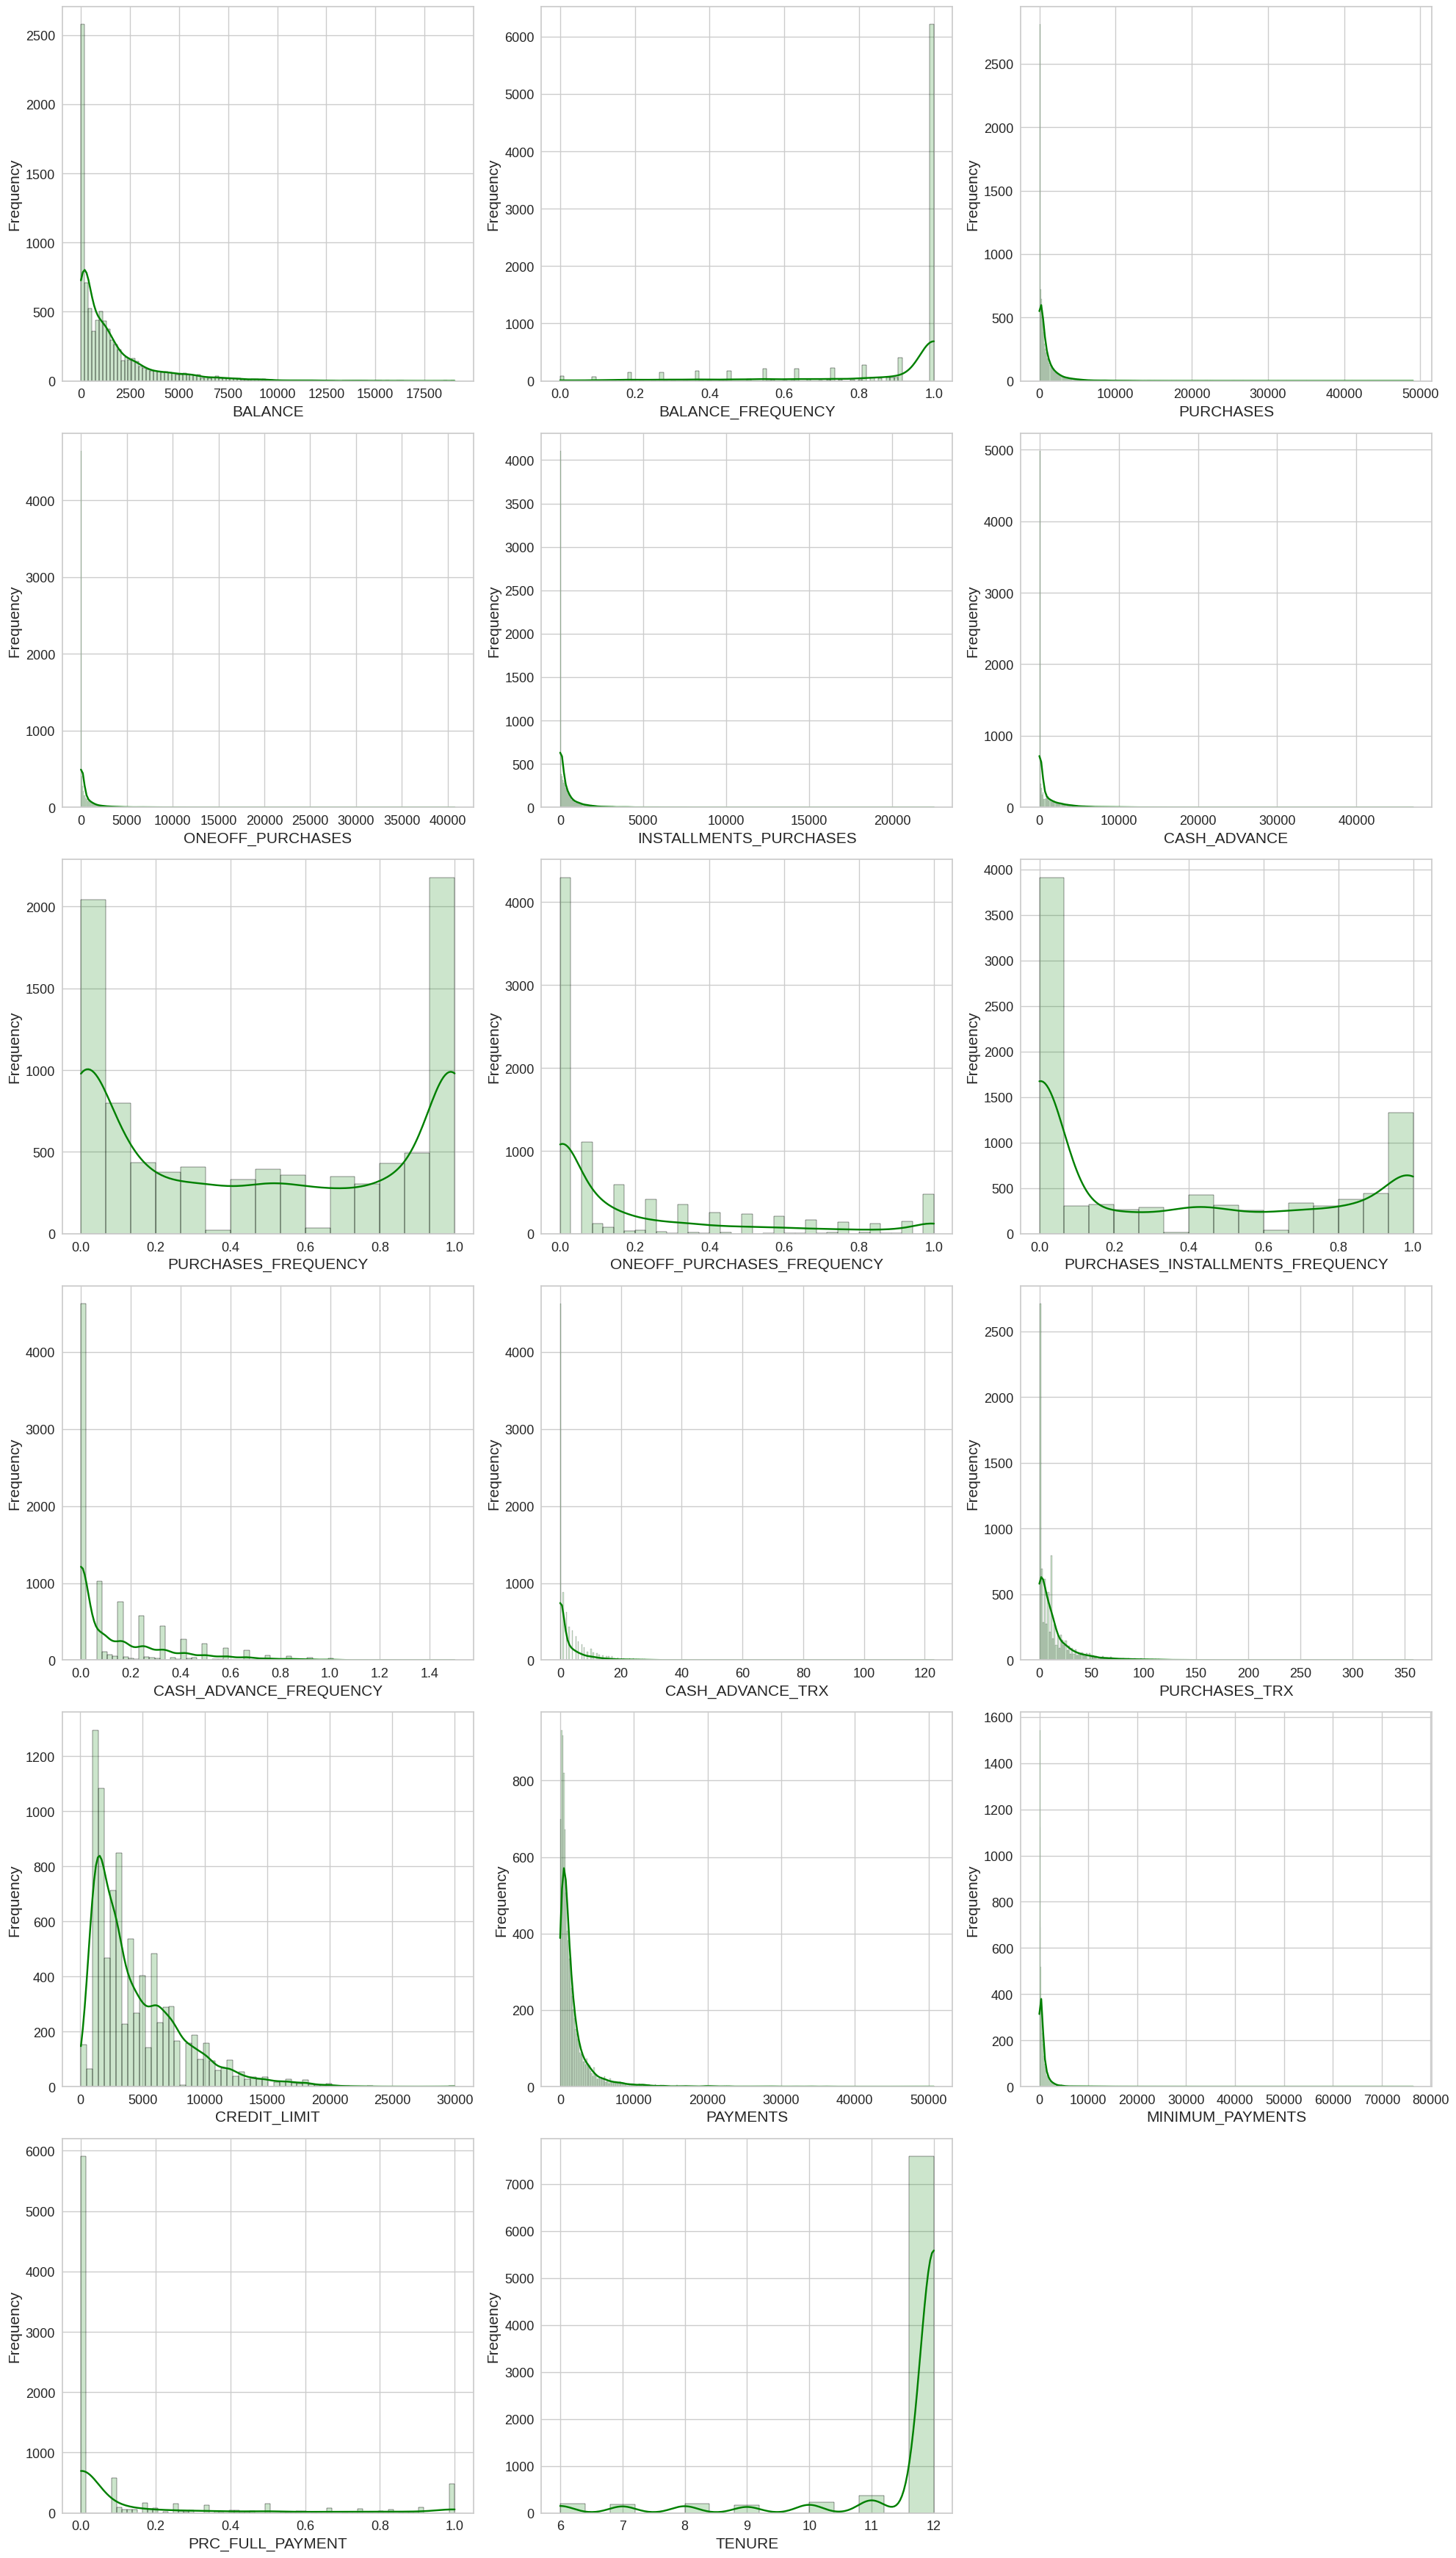

In [ ]:
# Creating Histogram for each feature
fig =  plt.figure(figsize = (20, 35))
for i, col in  enumerate(data.columns):
  ax = plt.subplot(6, 3, i+1)
  sns.histplot(data, x = col, ax = ax, color = 'green', kde = True, alpha = 0.2)
  plt.xlabel(col, fontsize = 15)
  plt.ylabel("Frequency", fontsize = 15)
  plt.xticks(fontsize = 13)
  plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

In [ ]:
# Utilizing a heatmap to assess the correlation between the features.
fig = plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap = "Greens", square = True, annot = True, linewidths = 0.5)

<Axes: >

# Removing Outliers

In [ ]:
# Replacing outliers with null values.
def replace_outliers(column):
  q25 = column.quantile(0.25)
  q75 = column.quantile(0.75)
  iqr = q75 - q25
  min_value = q25 - 1.5 * iqr
  max_value = q75 + 1.5 * iqr
  column[column < min_value] = np.nan
  column[column > max_value] = np.nan
  return column

data = data.apply(replace_outliers)

In [ ]:
# Counting the total number of outliers for each feature.
data.isnull().sum().sort_values(ascending=False)

BALANCE_FREQUENCY                   1492
PRC_FULL_PAYMENT                    1474
TENURE                              1365
CASH_ADVANCE                        1030
ONEOFF_PURCHASES                    1013
MINIMUM_PAYMENTS                     909
INSTALLMENTS_PURCHASES               867
PAYMENTS                             808
PURCHASES                            808
CASH_ADVANCE_TRX                     804
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_TRX                        766
BALANCE                              695
CASH_ADVANCE_FREQUENCY               525
CREDIT_LIMIT                         248
PURCHASES_FREQUENCY                    0
PURCHASES_INSTALLMENTS_FREQUENCY       0
dtype: int64

Mengimputasi null values dengan metode KNNImpute, yang mengestimasi missing values dengan utilizing rata rata dari n_neighbors pada training set

In [ ]:
imputer = KNNImputer()
data = pd.DataFrame(data = imputer.fit_transform(data), columns = data.columns)

In [ ]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Buat histograms untuk setiap fitur yang tanpa outlier
fig = plt.figure(figsize = (20, 35))
for i, col in enumerate(data.columns):
  ax = plt.subplot(6, 3, i+1)
  sns.histplot(data, x = col, ax = ax, color = "blue", kde = True, alpha = 0.2)
  plt.xlabel(col, fontsize = 15)
  plt.ylabel("Frequency", fontsize = 15)
  plt.xticks(fontsize = 13)
  plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

# Pemilihan Fitur

In [ ]:
# Pemilihan kolom untuk feature engineering
cols = ['BALANCE', "PURCHASES", 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
        'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

def feature_engg(column):
  column = np.sqrt(column)
  return column

In [ ]:
for col in cols:
  data[col] = feature_engg(data[col])

In [ ]:
# Buat histograms sesudah implementasi feature engineering
fig = plt.figure(figsize = (20, 35))
for i, col in enumerate(cols):
  ax = plt.subplot(6, 3, i+1)
  sns.histplot(data, x = col, ax = ax, color = "blue", kde = True, alpha = 0.2)
  plt.xlabel(col, fontsize = 15)
  plt.ylabel("Frequency", fontsize = 15)
  plt.xticks(fontsize = 13)
  plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

# Scaling Data

In [ ]:
# Scaling Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled = pd.DataFrame(data = data_scaled, columns = data.columns)
data_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.196032          -2.647658  -0.654366         -0.862556   
1  1.414124          -1.140357  -1.301258         -0.862556   
2  1.068900           0.366944   0.540342          1.554424   
3  0.594314           0.065483   1.262982          0.667682   
4 -0.041607           0.366944  -1.036336         -0.514863   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.070251     -0.797604            -0.806649   
1               -0.984889      1.164513            -1.221928   
2               -0.984889     -0.797604             1.269742   
3               -0.984889      0.063635            -1.014290   
4               -0.984889     -0.797604            -1.014290   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.744814                         -0.707409   
1                   -0.744814                         -0.917090   
2                    2.115946                         -0.917090   
3                   -0.378051                         -0.917090   
4                   -0.378051                         -0.917090   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.746426         -0.836549      -0.612438     -1.272657   
1                1.029758          1.127402      -1.348412      0.967992   
2               -0.746426         -0.836549       0.454348      1.094421   
3               -0.154367          0.145426      -0.828000      1.094421   
4               -0.746426         -0.836549      -0.828000     -1.142711   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0 -1.132749         -0.914731         -0.449298     0.0  
1  2.209019          1.386956          2.720734     0.0  
2 -0.413064          0.540286         -0.449298     0.0  
3 -2.085065         -0.269924         -0.449298     0.0  
4 -0.339081         -0.493166         -0.449298     0.0

# Reduksi Dimensi dengan PCA

Principal Component Analysis

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(data_scaled)

In [ ]:
data_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.675323 -3.218629 -0.230170  0.603025  0.264466  2.391614  0.435146   
1 -3.275562  1.919372  0.243140  2.335329  2.856347 -0.616066  1.281061   
2  1.534710  1.225007 -2.715862 -1.173708 -0.122120  0.025554  0.305038   
3 -0.996614 -0.236479 -1.527233 -0.787821 -0.295933  0.380365 -0.716172   
4 -1.305772 -2.020334 -0.902765 -0.989197  0.135253 -0.236427  0.651570   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.241956 -0.041941  0.086183  0.459362  0.091759 -0.096497  0.072751   
1 -0.054496  0.213885  0.045375 -0.173004 -0.197758 -0.110717 -0.071947   
2  1.101516  0.985961 -0.107035 -0.288219 -0.073133  0.377596  0.019045   
3  1.701519 -1.427763 -0.152826  0.233419  0.536618  1.107564 -0.231820   
4 -0.706257  0.257405  0.049616  0.059340 -0.380466  0.263546  0.043568   

       PC15      PC16  PC17  
0 -0.141555 -0.002155   0.0  
1  0.001424  0.046052  -0.0  
2  0.251877  0.798654   0.0  
3  0.706399 -0.330827  -0.0  
4 -0.180229 -0.064325  -0.0

Analisis komponen menggunakan variance ratio untuk identifikasi angka komponen yang optimal

In [ ]:
evr = list(pca.explained_variance_ratio_)
evr = sorted(evr, reverse=True)

evr_cum = list(pca.explained_variance_ratio_.cumsum())

num_components = [x + 1 for x in range(X_pca.shape[1])]

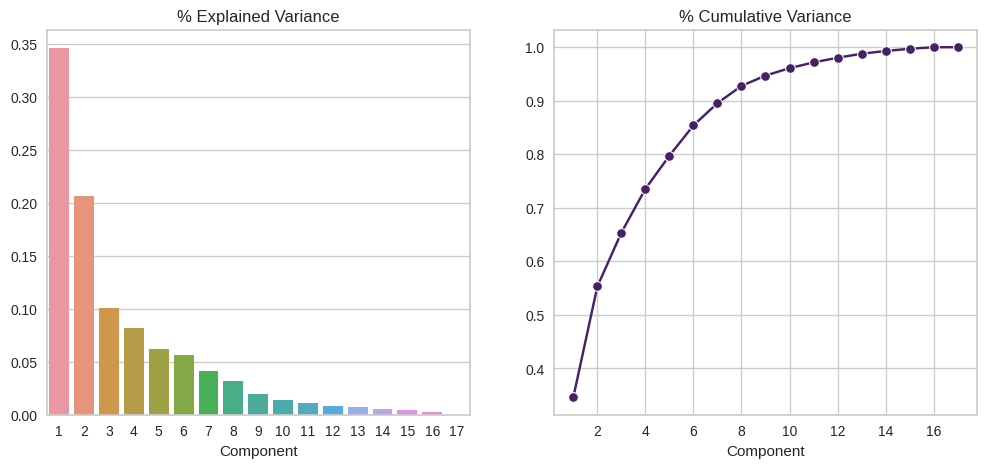

In [ ]:
fig, ax = plt.subplots(1 , 2, figsize = (12, 5))

sns.barplot(x = num_components, y = evr, ax = ax[0])
ax[0].set_xlabel("Component")
ax[0].set_title("% Explained Variance")

sns.lineplot(x = num_components, y = evr_cum, marker = 'o', ax = ax[1])
ax[1].set_xlabel("Component")
ax[1].set_title("% Cumulative Variance")

fig.show()

Dari hasil Explained variance dan Cumulative Variance, terlihat visualisasi terbaik pada 5 components yang memberi jumlah dimensi yang lebih sedikit dengan explained variance yang lebih banyak

In [ ]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(data_scaled)

In [ ]:
data_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
data_pca.head()

PC1       PC2       PC3       PC4       PC5
0 -0.675323 -3.218629 -0.230170  0.603025  0.264465
1 -3.275562  1.919372  0.243140  2.335329  2.856346
2  1.534710  1.225007 -2.715862 -1.173708 -0.122124
3 -0.996614 -0.236479 -1.527233 -0.787821 -0.295925
4 -1.305772 -2.020334 -0.902765 -0.989197  0.135253

# K-Means Clustering

In [ ]:
kmeans_models = [KMeans(n_clusters = k, random_state = 42).fit(X_pca) for k in range(1, 10)]

In [ ]:
# Utilizing WCSS as a metric to select the number of clusters using the elbow metod.
inertias = [model.inertia_ for model in kmeans_models]

In [ ]:
fig = plt.figure(figsize = (6, 4))
sns.lineplot(x = list(range(1, 10)), y = inertias, marker = 'o')
plt.xlabel("Angka Clusters")
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state=0)
vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(data_scaled)
vis_elbow.poof()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

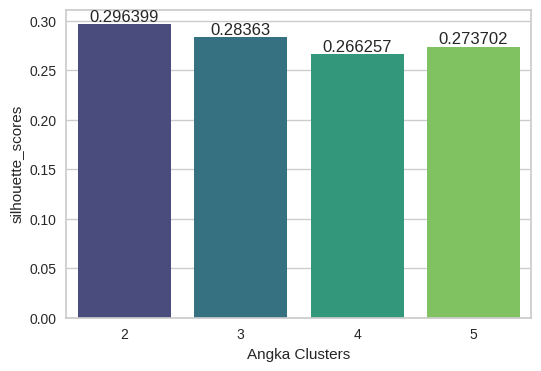

In [ ]:
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_models[1:5]]

fig = plt.figure(figsize = (6, 4))
ax = sns.barplot(x = [2,3,4,5], y = silhouette_scores, palette = 'viridis')
ax.bar_label(ax.containers[0])
plt.xlabel("Angka Clusters")
plt.ylabel('silhouette_scores')
plt.show()

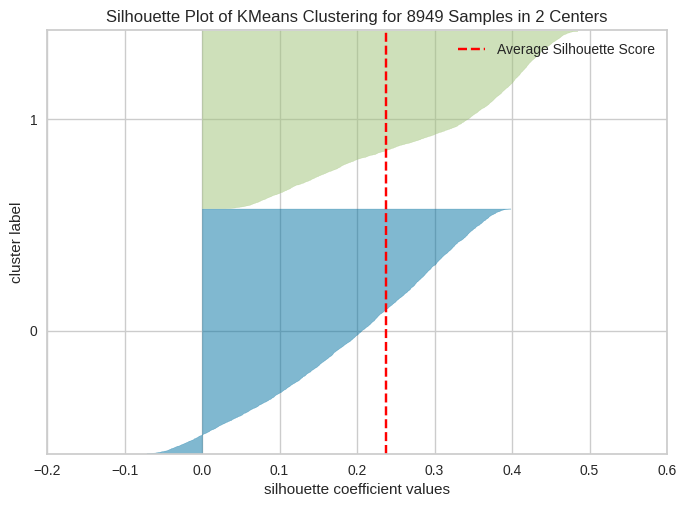

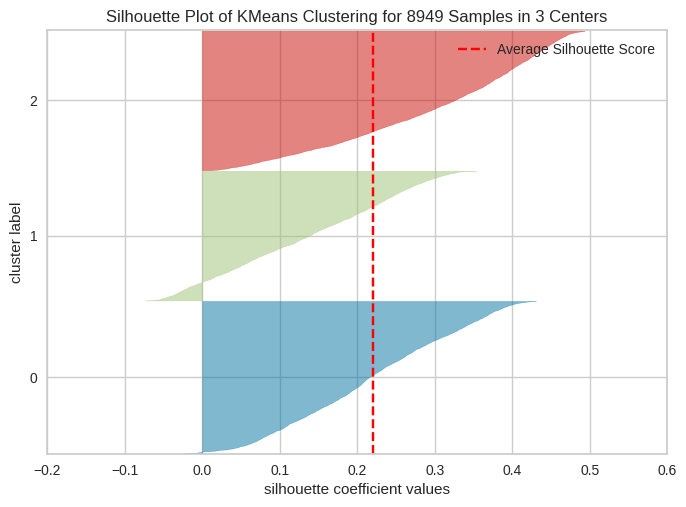

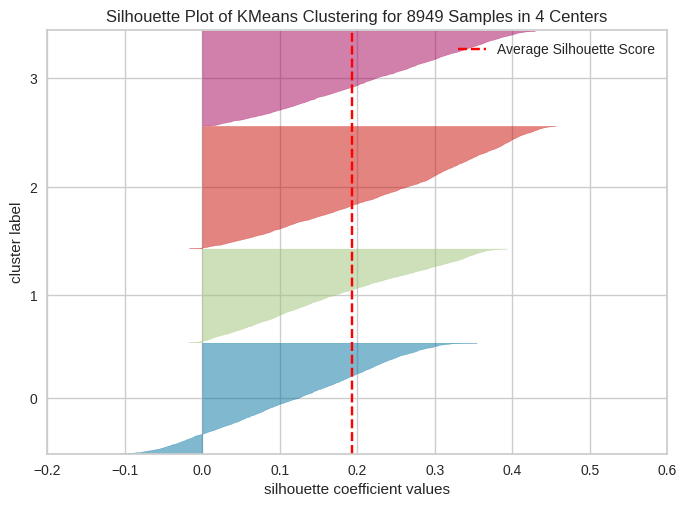

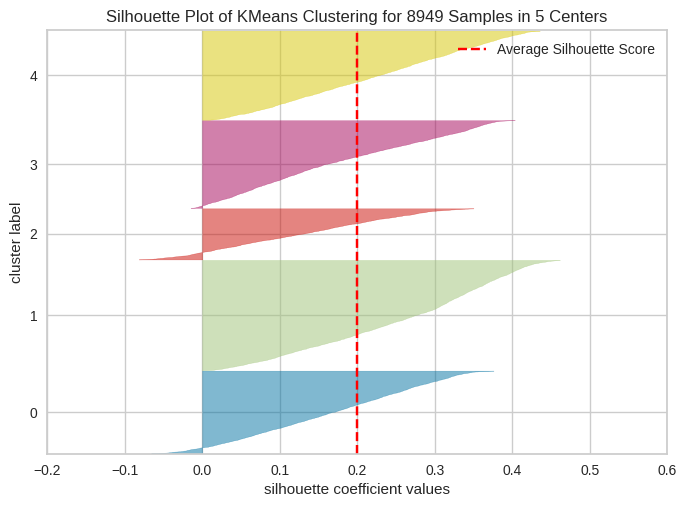

In [ ]:
for i, n_cluster in enumerate(range(2, 6)):
  kmeans = KMeans(n_clusters=n_cluster, random_state=0)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick',
                                    show_labels=True)
  visualizer.fit(data_scaled)
  visualizer.poof()

Terlihat dengan 3 cluster hasil lebih terdistribusi dengan seimbang

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=0)

pca_labels = kmeans.fit_predict(X_pca)

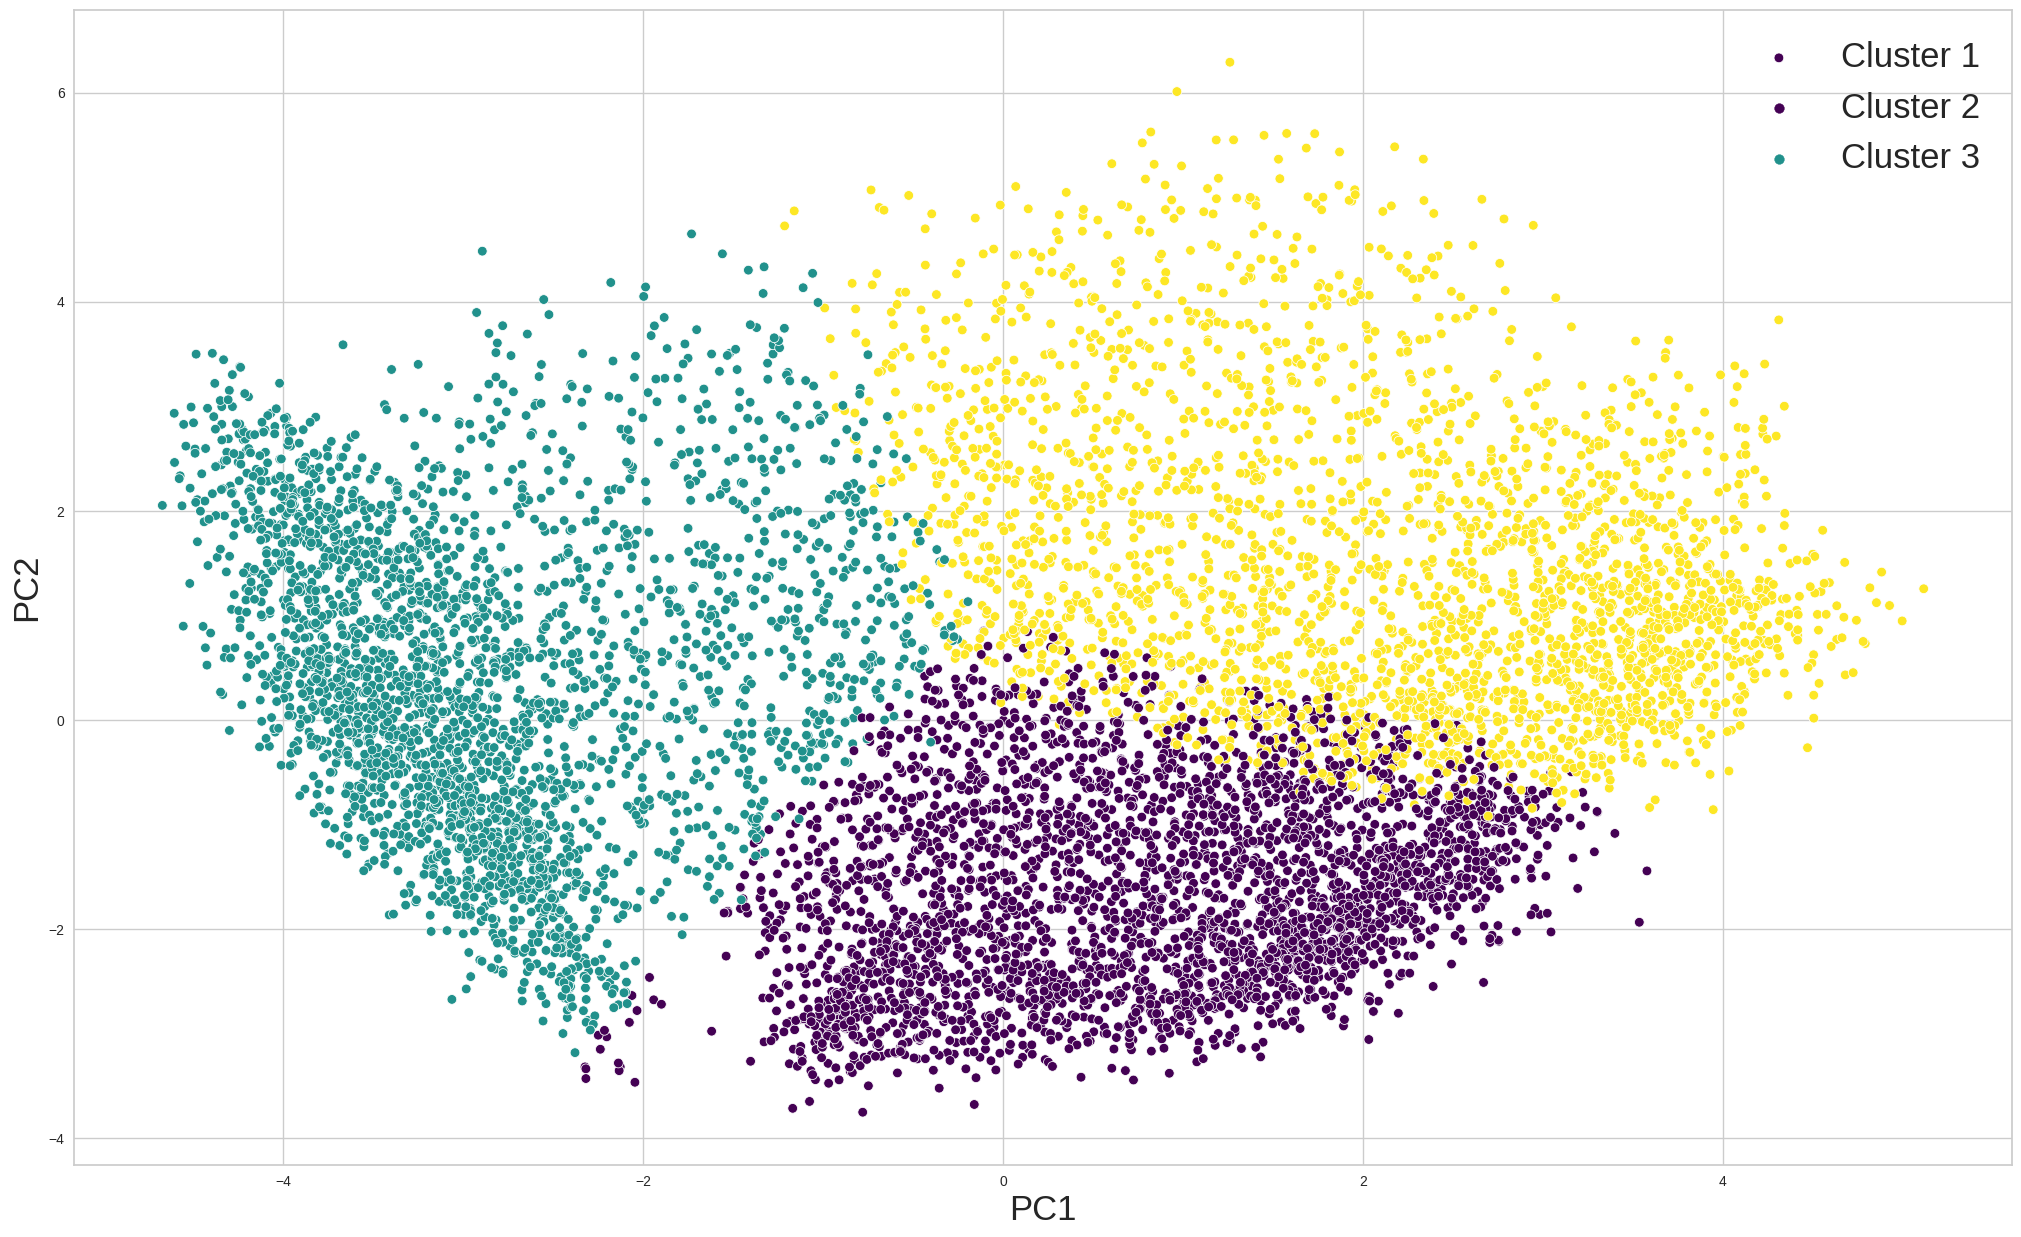

In [ ]:
plt.figure(figsize=(25,15))
sns.scatterplot(data = data_pca, x = "PC1", y="PC2", hue = pca_labels, palette='viridis')
plt.xlabel("PC1", fontsize = 25)
plt.ylabel("PC2", fontsize = 25)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'],fontsize = 25)

plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(data_pca, x="PC1", y = "PC2", z = "PC3", color = pca_labels)
fig.show()

In [ ]:
# Reverting the modifications previously made during the feature enigneering process
def feature_engg(column):
  column = np.square(column)
  return column

for col in cols:
  data[col] = data[col].apply(feature_engg)

In [ ]:
# addign a "Cluster" column to the original data frame
data['cluster'] = pca_labels

Menilai korelasi antara fitur dan variabel cluster untuk menginformasikan pemilihan fitur untuk analisis selanjutnya

<Axes: >

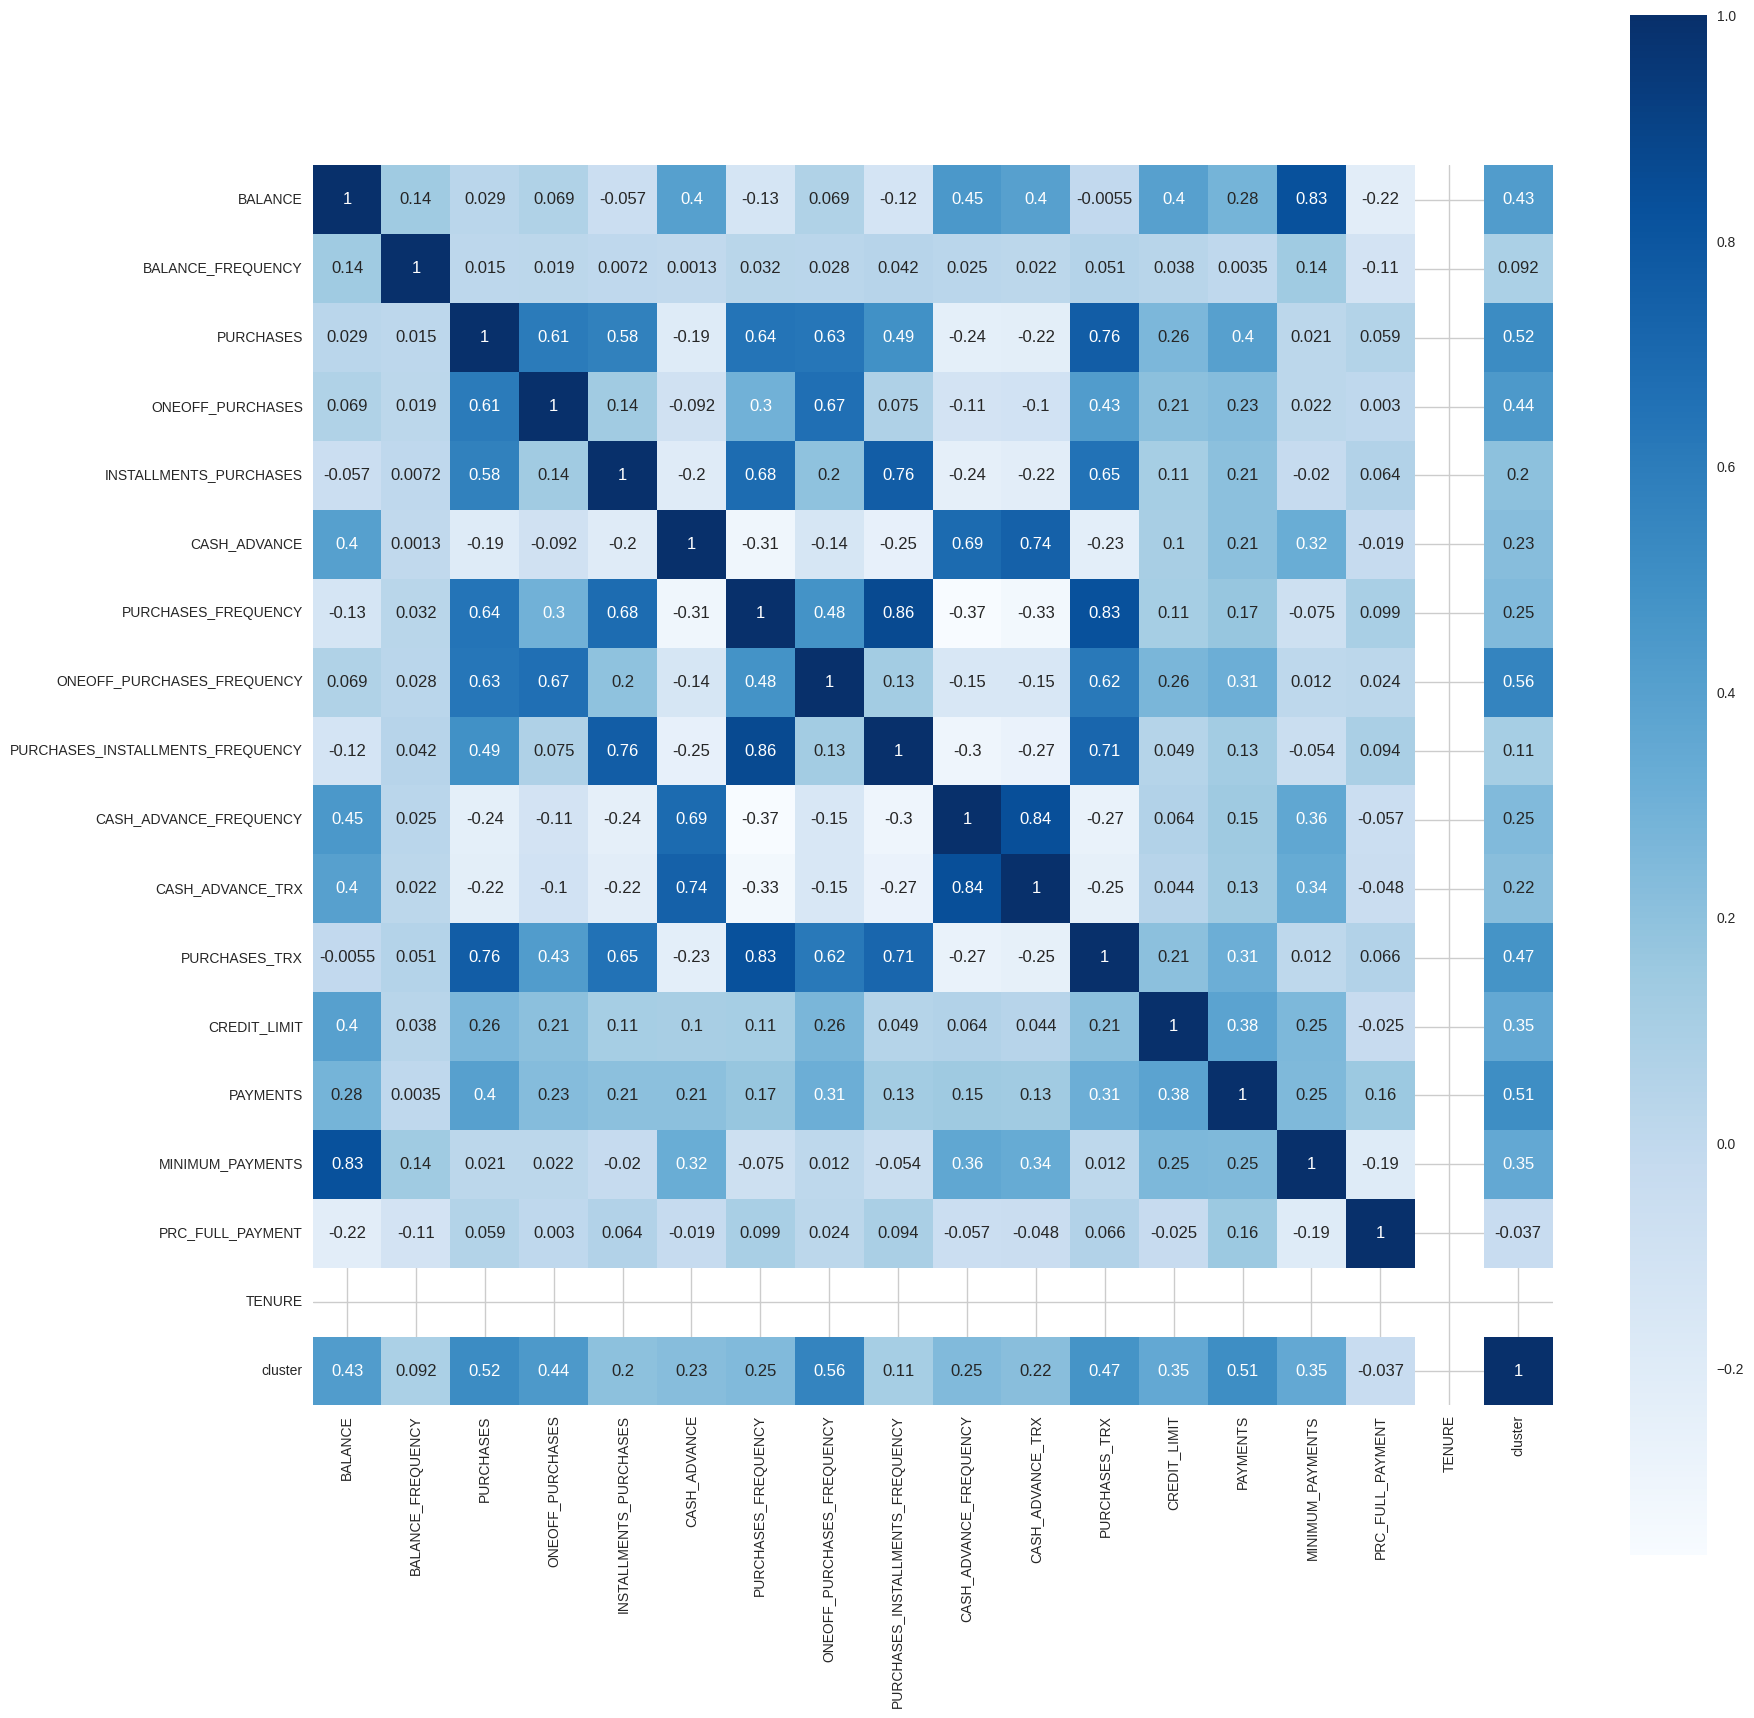

In [ ]:
corr = data.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, square = True, annot=True, cmap='Blues')

In [ ]:
cols_imp = list(corr[corr['cluster'] > 0.3].index)
cols_imp

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'cluster']

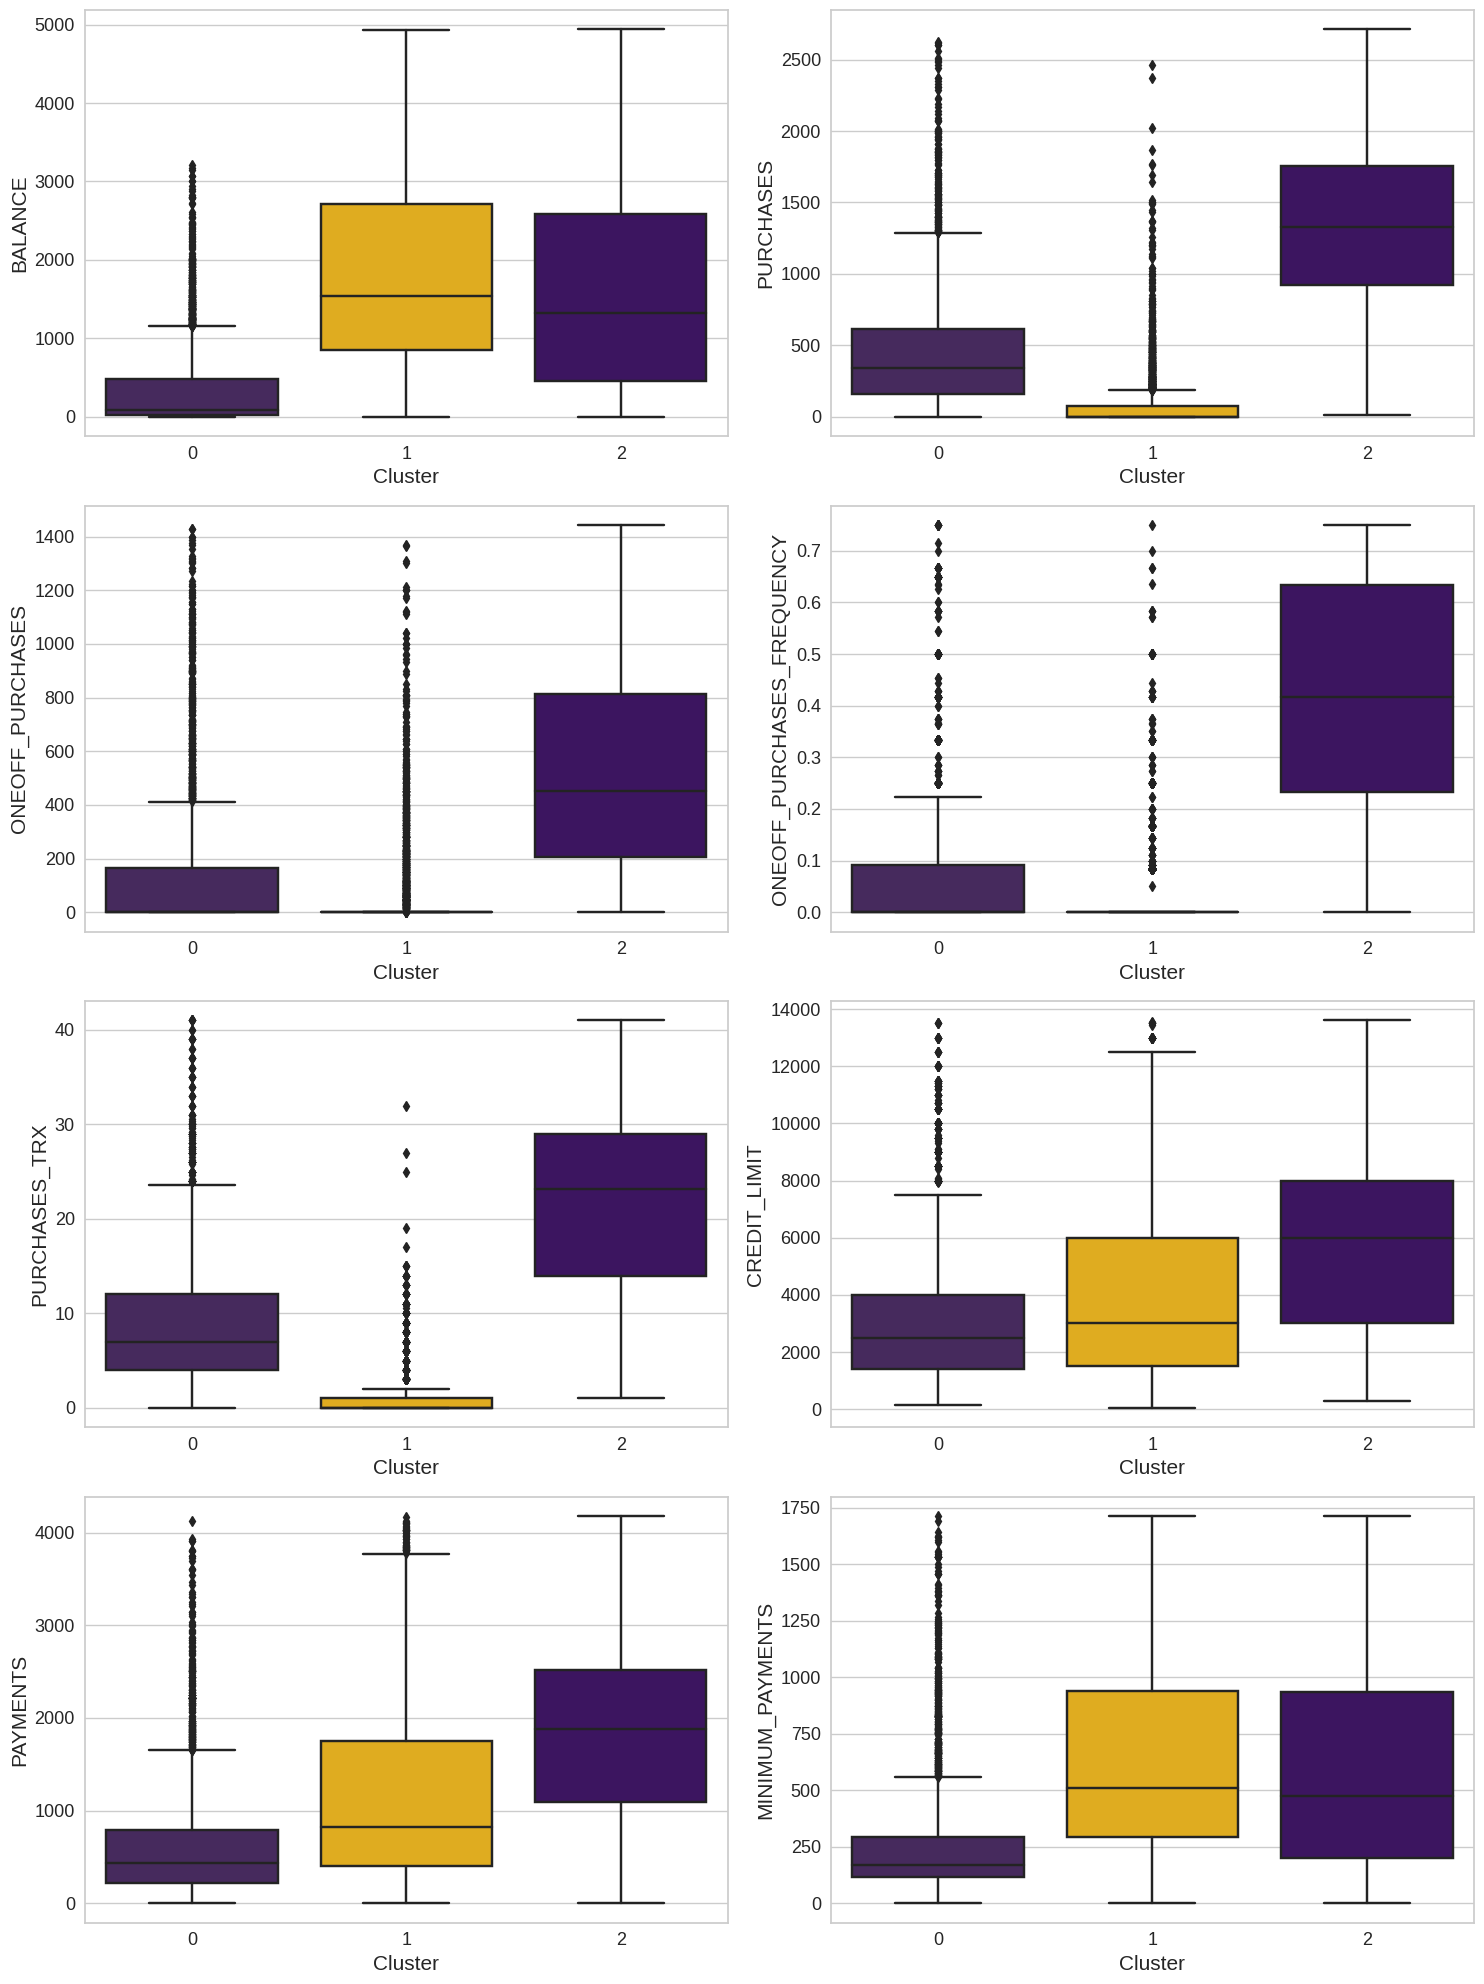

In [ ]:
plt.figure(figsize = (15, 20))
for i, col in enumerate(cols_imp[:-1]):
  ax=plt.subplot(4,2,i+1)
  sns.boxplot(x = data['cluster'], y = data[col])
  plt.xlabel("Cluster", fontsize = 15)
  plt.ylabel(col, fontsize=15)
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)

plt.tight_layout()
plt.show()